In [1]:
# from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [2]:
locations = pd.read_csv('..\data\location_df.csv', 
                       usecols=['id', 'name', 'streetAddress', 'locality', 'locationTypeDisplay',
                                'countryIsoCode', 'region', 'postalCode',
                                'latitude', 'longitude', 'brewery.isMassOwned'])

In [3]:
# Import us shape
us_country = gpd.read_file('../data/gz_2010_us_040_00_5m.json')
world_map = gpd.read_file('../data/custom.geo.json')

In [4]:
region_division = pd.read_csv('..\data\\region_division.csv',
                             usecols=['REGION','DIVISION', 'NAME'])

In [5]:
region_division.columns = region_division.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

In [6]:
region_map = {
    '1': 'Northeast',
    '2': 'Midwest',
    '3': 'South',
    '4': 'West',
    'X': 'Undefined'
}

In [7]:
division_map = {
    '1': 'New England',
    '2': 'Middle Atlantic',
    '3': 'East North Central',
    '4': 'West North Central',
    '5': 'South Atlantic',
    '6': 'East South Central',
    '7': 'West South Central',
    '8': 'Mountain',
    '9': 'Pacific',
    'X': 'Undefined'
}

In [8]:
# merge both df so region and division are added
location_region_division = pd.merge(locations, region_division, left_on='region', right_on='name')

In [9]:
# map the regions so numbers are the name of the region
location_region_division['us_region'] = location_region_division.region_y.map(region_map) 

In [10]:
# map the regions so numbers are the name of the region
location_region_division['us_division'] = location_region_division.division.map(division_map) 

In [11]:
geo_region_division = gpd.GeoDataFrame(
    location_region_division, geometry=gpd.points_from_xy(location_region_division.longitude, location_region_division.latitude))

In [12]:
locations.head()

,id,name,streetAddress,locality,region,postalCode,latitude,longitude,locationTypeDisplay,countryIsoCode,brewery.isMassOwned
0,udRaBO,(Closed) Boulder Beer on Walnut,1123 Walnut St,Boulder,Colorado,80302,40.016871,-105.280436,Brewpub,US,N
1,Deav9L,10 Barrel Brewing Company,2620 Walnut Street,Denver,Colorado,80205,39.759391,-104.985481,Brewpub,US,Y
2,NpnmAJ,10 Torr Distilling and Brewing,490 Mill St,Reno,Nevada,89502,39.525533,-119.805815,Micro Brewery,US,N
3,4XTqCU,127 Brewing,3090 Shirley Drive,Jackson,Michigan,49201,42.286012,-84.431261,Micro Brewery,US,N
4,xeSrCy,13 Point Brewing Co.,8035 Broadway,Lemon Grove,California,91945,32.742781,-117.024905,Micro Brewery,US,N


In [13]:
stats = {}
for i in locations.region:
    if i in stats:
        stats[i] += 1
    else:
        stats[i] = 1

In [14]:
# What country has the most beers?
country_count = locations['countryIsoCode'].value_counts()
country_count.head(10)

US    7257
DE     605
CA     367
CZ     278
GB     264
BE     147
AU     129
FR      85
NZ      71
IT      49
Name: countryIsoCode, dtype: int64

In [15]:
# What states within the US have the most breweries?
state_count = locations['region'].value_counts()
state_count.head(10)

California        853
Colorado          403
New York          403
Washington        348
Pennsylvania      331
Michigan          323
North Carolina    322
Texas             298
Florida           297
Oregon            282
Name: region, dtype: int64

In [16]:
# What type of beer is most prevalent in the US?
beer_type_count = locations[locations['countryIsoCode'] == 'US']['locationTypeDisplay'].value_counts()
beer_type_count

Micro Brewery           5367
Brewpub                  987
Nano Brewery             290
Tasting Room             210
Restaurant/Ale House     145
Cidery                    85
Production Facility       80
Meadery                   40
Office                    32
Macro Brewery             21
Name: locationTypeDisplay, dtype: int64

In [17]:
geo_locations = gpd.GeoDataFrame(
    locations, geometry=gpd.points_from_xy(locations.longitude, locations.latitude))

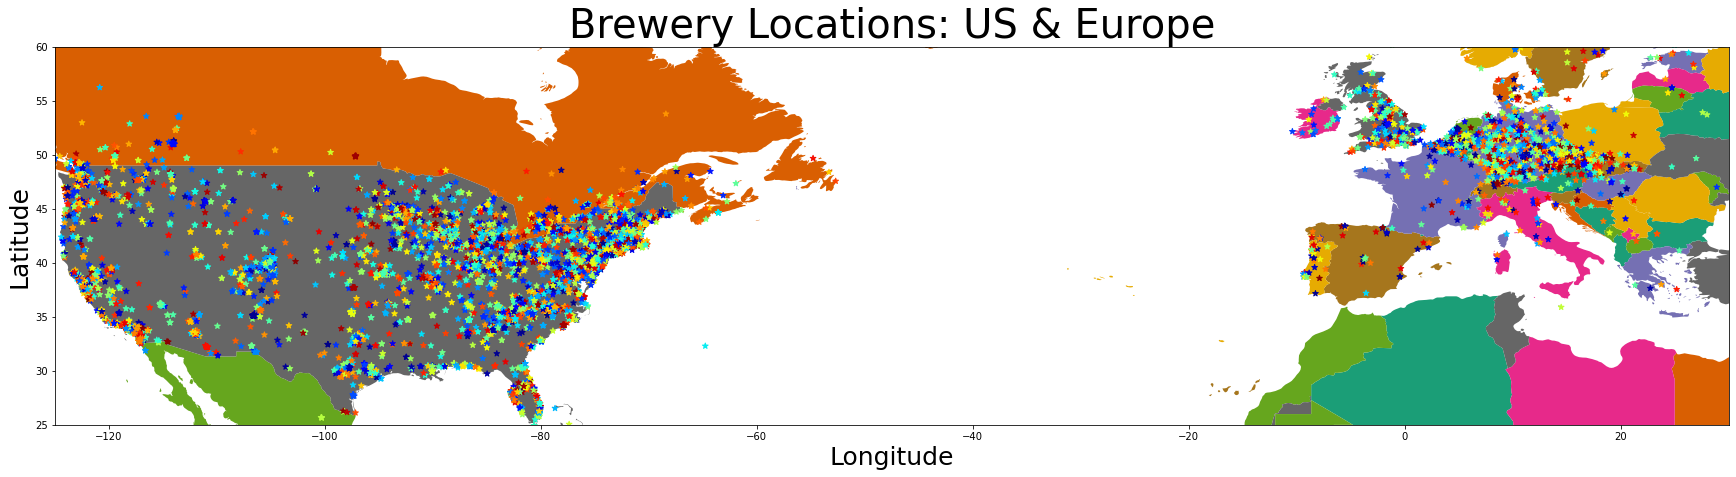

In [18]:
# Plotting to see the hurricane overlay the US map:
fig, ax = plt.subplots(1, figsize=(30,20))
base = world_map.plot(ax=ax, column = 'sovereignt', cmap='Dark2')
plt.title('Brewery Locations: US & Europe', loc='center', fontsize=40)
plt.xlim(-125, 30)
plt.ylim(25, 60)
plt.xlabel('Longitude', fontsize = 25)
plt.ylabel('Latitude', fontsize = 25)
# plotting locations over states
geo_locations.plot(ax=base, column=geo_locations.locality, marker="*", legend=False, cmap='jet')

plt.savefig('../data/us_euro_map.png',bbox_inches='tight')


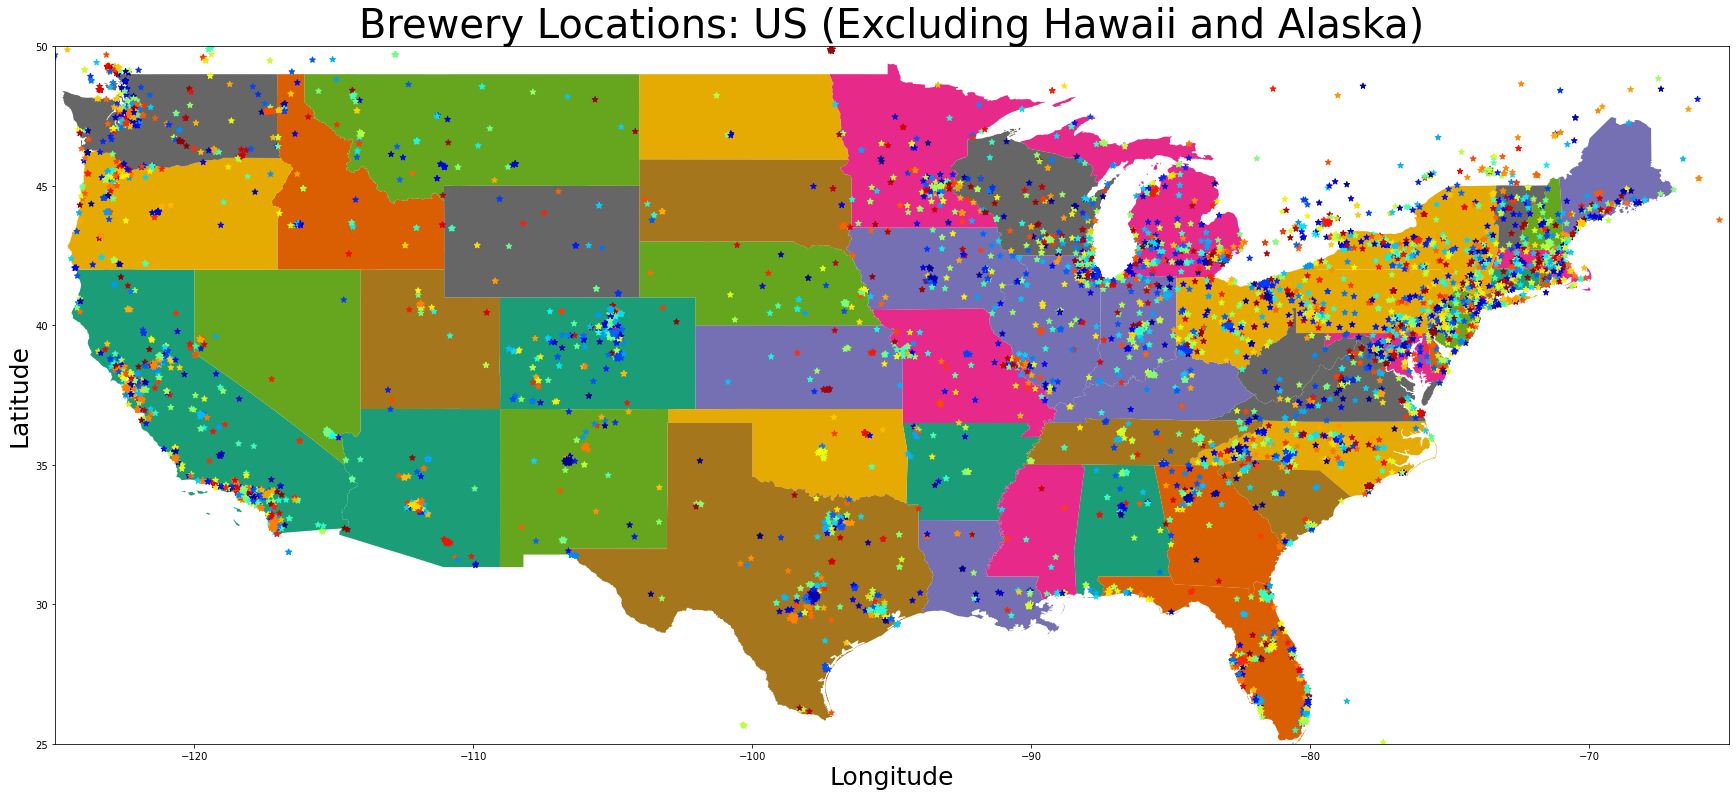

In [19]:
# Plotting to see the hurricane overlay the US map:
fig, ax = plt.subplots(1, figsize=(30,20))
base = us_country.plot(ax=ax, column = 'STATE', cmap='Dark2')
plt.xlim(-125, -65)
plt.ylim(25, 50)
plt.title('Brewery Locations: US (Excluding Hawaii and Alaska)', loc='center', fontsize=40)
plt.xlabel('Longitude', fontsize = 25)
plt.ylabel('Latitude', fontsize = 25)
# plotting locations over states
geo_locations.plot(ax=base, column=geo_locations.locality, marker="*", legend=False, cmap='jet')

plt.savefig('../data/us_brewery_map.png',bbox_inches='tight')


In [20]:
# # Plotting to see the hurricane overlay the US map:
# fig, ax = plt.subplots(1, figsize=(30,20))
# base = us_country.plot(ax=ax, cmap='Dark2')
# plt.xlim(-125, -65)
# plt.ylim(25, 50)
# plt.title('Brewery Locations: US (Excluding Hawaii and Alaska)', loc='center', fontsize=40)
# plt.xlabel('Longitude', fontsize = 25)
# plt.ylabel('Latitude', fontsize = 25)
# # plotting locations over states
# geo_locations.plot(ax=base, column=geo_locations.us_division, marker="*", legend=False, cmap='jet')


In [21]:
location_region_division['us_division'].value_counts()

Pacific               1541
East North Central    1213
South Atlantic        1158
Mountain               855
Middle Atlantic        842
West North Central     506
New England            478
West South Central     403
East South Central     203
Name: us_division, dtype: int64

In [22]:
location_region_division['us_region'].value_counts()

West         2396
South        1764
Midwest      1719
Northeast    1320
Name: us_region, dtype: int64

In [23]:
location_region_division['locality'].value_counts().head(10)

Portland         110
Denver            80
San Diego         80
Chicago           66
Seattle           55
Indianapolis      43
San Francisco     40
Albuquerque       39
Columbus          38
Austin            37
Name: locality, dtype: int64

In [24]:
location_region_division = location_region_division.drop(['name_y', 'division', 'region_y'], axis=1)

In [25]:
location_region_division.to_csv("../data/location_region_division.csv", encoding='utf-8', index = False)

In [26]:
location_region_division

,id,name_x,streetAddress,locality,region_x,postalCode,latitude,longitude,locationTypeDisplay,countryIsoCode,brewery.isMassOwned,us_region,us_division,geometry
0,udRaBO,(Closed) Boulder Beer on Walnut,1123 Walnut St,Boulder,Colorado,80302,40.016871,-105.280436,Brewpub,US,N,West,Mountain,POINT (-105.28044 40.01687)
1,Deav9L,10 Barrel Brewing Company,2620 Walnut Street,Denver,Colorado,80205,39.759391,-104.985481,Brewpub,US,Y,West,Mountain,POINT (-104.98548 39.75939)
2,OaZYgf,16th Street Tavern,915 16th St,Greeley,Colorado,80631,40.413942,-104.693704,Micro Brewery,US,N,West,Mountain,POINT (-104.69370 40.41394)
3,pvSIT8,Adamant Brewing Company,1001 Lee Hill Drive,Boulder,Colorado,80302,40.062969,-105.284195,Micro Brewery,US,N,West,Mountain,POINT (-105.28419 40.06297)
4,mn2Xz5,Angry James Brewery,421 Adams Avenue,Silverthorne,Colorado,80498,39.632207,-106.076197,Micro Brewery,US,N,West,Mountain,POINT (-106.07620 39.63221)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7194,sDAQv6,Main Brewery,580 N. Nimitz Highway,Honolulu,Hawaii,96817,21.313578,-157.869622,Micro Brewery,US,N,West,Pacific,POINT (-157.86962 21.31358)
7195,5GoGSi,Main Brewery,275 West Kaahumanu Avenue,Kahului,Hawaii,96732,20.885967,-156.474988,Micro Brewery,US,N,West,Pacific,POINT (-156.47499 20.88597)
7196,vFNWz9,Main Brewery,"I, Koko Marina Center, Koko Marina Shopping Ce...",Honolulu,Hawaii,96825,21.278029,-157.705461,Restaurant/Ale House,US,Y,West,Pacific,POINT (-157.70546 21.27803)
7197,37vxjL,Main Brewery,4350 Waialo Road,Port Allen,Hawaii,96705,21.903375,-159.594645,Brewpub,US,N,West,Pacific,POINT (-159.59464 21.90337)
